<h2 style = 'color: #ffc300; text-align:center' ><b>Preprocessing the Data</b></h2>

<p style = 'text-align: center'>Let's First quickly see corealtion b/w the numerical feature and our target column</p>

In [805]:
## Importing the EDA file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## setting by default graph style here
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['axes.titlecolor'] = '#003049'
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = '#219ebc'


## Loading the file
df = pd.read_pickle('EDA.pkl')

First Let's check corelation b/w the numerical Data's

In [806]:
num_col = df.select_dtypes(exclude= 'object').columns.to_list()

<Axes: >

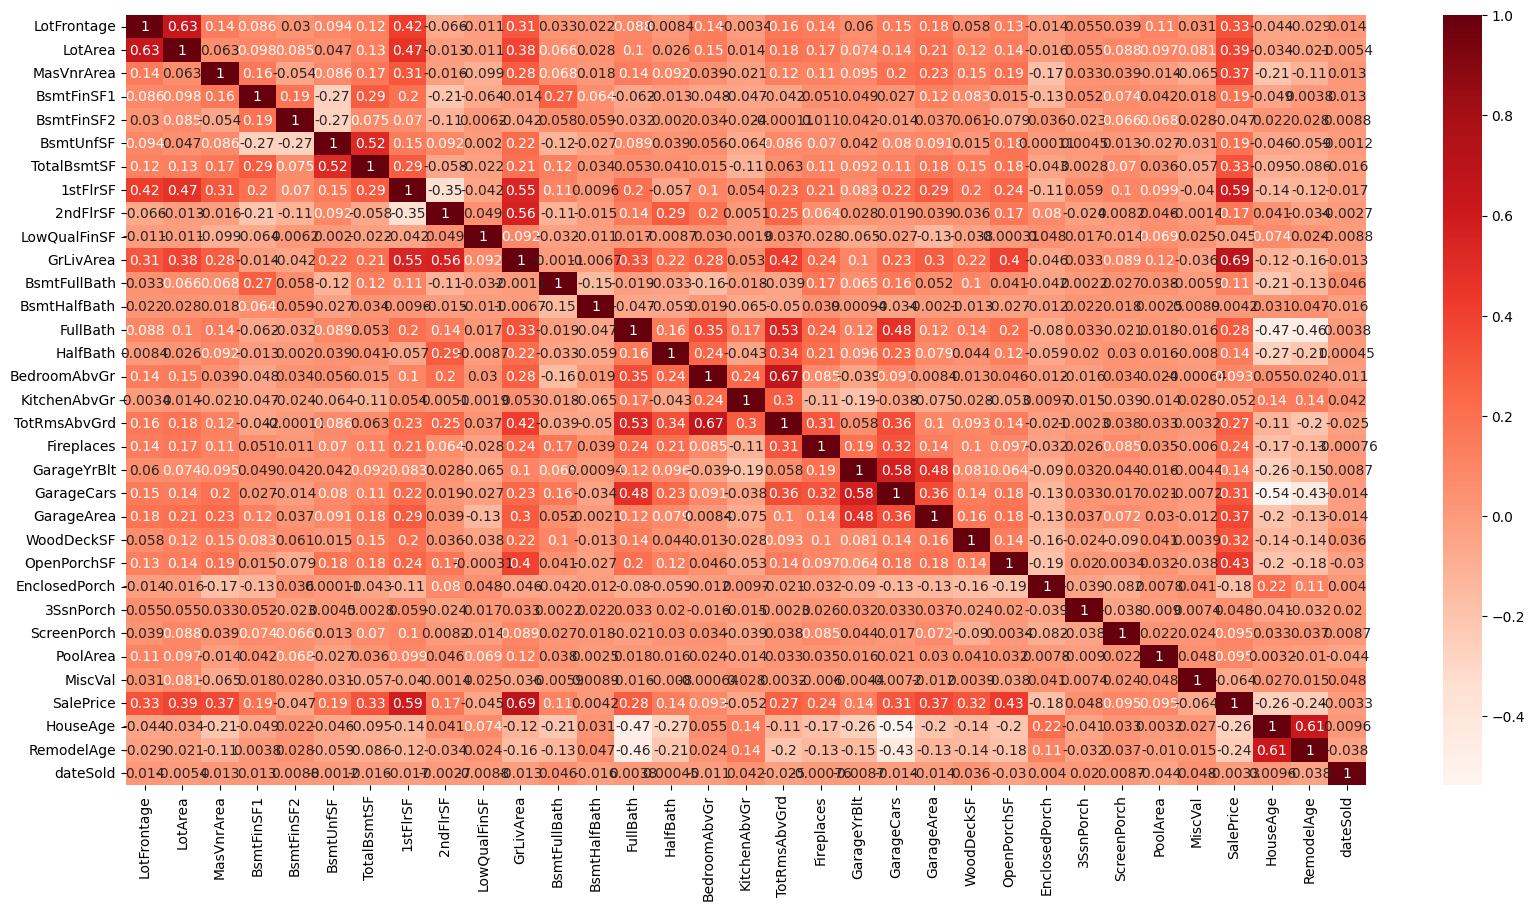

In [807]:
## First
plt.figure(figsize=(20, 10))
sns.heatmap(df[num_col].corr(), annot = True, cmap = 'Reds')


Well Let's first have these all data and try to build model using all the features and see it's accuracy

In [808]:
all_df = df.copy() ## making copy of df for this process
all_df.shape

(2908, 79)

<li style = 'color: orange; text-align:center'>Preprocessing data</li><p style = 'color:yellow; text-align:center'>Categorical_columns</p>

In [809]:
cat_cols = all_df.select_dtypes(include = 'object').columns.to_list()
print(len(cat_cols))
print(cat_cols)

46
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Checking <code>MSSubClass</code>

In [810]:
print(all_df['MSSubClass'].value_counts())

MSSubClass
20     1074
60      575
50      285
120     182
30      137
160     128
70      127
80      117
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64


Here What i will do for those category where data is less than 100 i will change their name as other

In [811]:
## But to that for upcoming new data also will do this logic
Ms = all_df['MSSubClass'].value_counts()
categories_to_replace = Ms[Ms < 150].index
all_df['MSSubClass'] =  all_df['MSSubClass'] .replace(categories_to_replace, 'Other')
all_df['MSSubClass'].value_counts()

MSSubClass
20       1074
Other     792
60        575
50        285
120       182
Name: count, dtype: int64

Now Same Code i will convert into a Function so that if something like this i need later i can use simply without writing the code again and again

In [812]:
## creating the function
def introduce_other(column_name, threshold):
    # Count the occurrences of each category in the column
    counts = all_df[column_name].value_counts()
    
    # Identify categories with occurrences below the threshold
    categories_to_replace = counts[counts < threshold].index
    
    # Replace those categories with "Other"
    all_df[column_name] = all_df[column_name].replace(categories_to_replace, 'Other')
    
    # Return the updated value counts
    return all_df[column_name].value_counts()

Now This Function Will help me later i hope.<br>
Well as of now this column is ready for apply onehotencoding. But first let's first check if there are other columns where i can apply Onehotencoding.<br>
<b>Doing This to save time (otherwise for each column individually have to apply OHE)</b>

In [813]:
ohe_cols = ['MSSubClass'] ## For Stroing OneHotType columns

<code>MSZoning</code>

In [814]:
all_df['MSZoning'].value_counts()

MSZoning
RL         2261
RM          457
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [815]:
## reduce some extra data points
print(introduce_other('MSZoning', 100))
ohe_cols.append('MSZoning')

MSZoning
RL       2261
RM        457
FV        139
Other      51
Name: count, dtype: int64


<code>Street</code>

In [816]:
all_df['Street'].value_counts()

Street
Pave    2897
Grvl      11
Name: count, dtype: int64

Since There is only 11 data for Street (Grvl) it means most of them are Pave. So if we even delete this column it won't effect on our model. What u think?

In [817]:
## deleting thi street column from data
all_df.drop('Street', axis = 1, inplace = True)
all_df.shape

(2908, 78)

<code>Alley</code>

Alley
No Alley    2727
Grvl          99
Pave          82
Name: count, dtype: int64


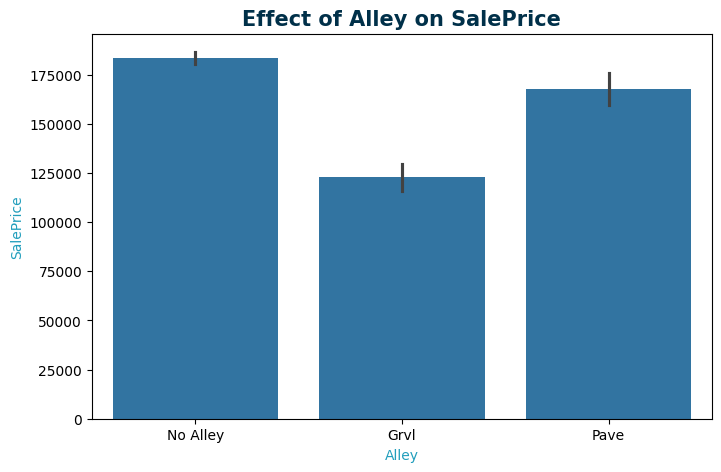

In [818]:
print(all_df['Alley'].value_counts())
## Effect of Alley on Sale Price
sns.barplot(data = all_df, x = 'Alley', y = 'SalePrice', estimator= np.mean)
plt.title('Effect of Alley on SalePrice')
plt.show()

Since Occurance of Grvl and Pave are very low compare to NoAlley and even their effect on Sale price does'nt very vary so i'll tranform this column in binary 1(For Alley) 0(No Alley)

In [819]:
## creating binary column for Alley
all_df['Alley'] = all_df['Alley'].apply(lambda x: 0 if x ==  "No Alley" else 1)
print(all_df['Alley'].value_counts())

Alley
0    2727
1     181
Name: count, dtype: int64


<code>LotShape</code>

In [820]:
all_df['LotShape'].value_counts()

LotShape
Reg    1852
IR1     964
IR2      76
IR3      16
Name: count, dtype: int64

In [821]:
## last two data's are very low in quantity
print(introduce_other('LotShape', 100)) 
ohe_cols.append('LotShape')

LotShape
Reg      1852
IR1       964
Other      92
Name: count, dtype: int64


['LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']<br> <b style = 'color:orange'>For convenience Purpose Only</b>

<code>LandContour</code>

In [822]:
print(all_df['LandContour'].value_counts())
ohe_cols.append('LandContour')

LandContour
Lvl    2613
HLS     120
Bnk     116
Low      59
Name: count, dtype: int64


Text(0.5, 1.0, 'Effect of LandContour on sale')

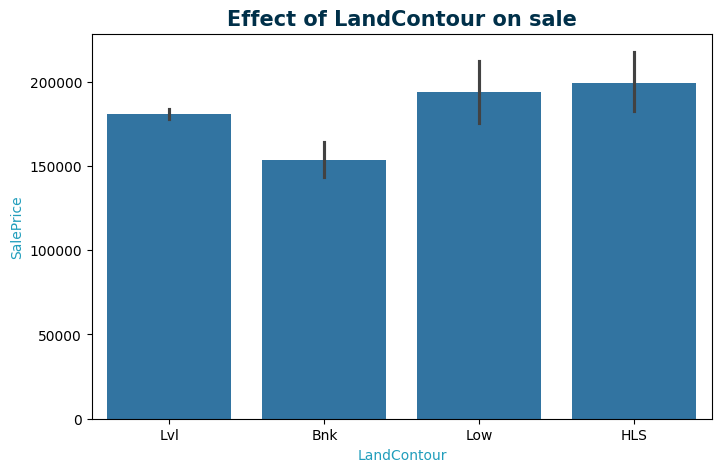

In [823]:
sns.barplot(data = all_df, x = 'LandContour', y = 'SalePrice')
plt.title('Effect of LandContour on sale')

<code>Utlities</code>

In [824]:
df['Utilities'].value_counts()

Utilities
AllPub    2907
NoSeWa       1
Name: count, dtype: int64

Since here only 1 value is for Utilities (NoSeWa) so deleting this column because it has almost no variability, making it unlikely to provide meaningful information for our model.

In [825]:
all_df.drop('Utilities', axis = 1, inplace = True)
print(all_df.shape)

(2908, 77)


<code>LotConfig</code>

LotConfig
Inside     2126
Corner      509
CulDSac     176
FR2          84
FR3          13
Name: count, dtype: int64


<Axes: xlabel='LotConfig', ylabel='SalePrice'>

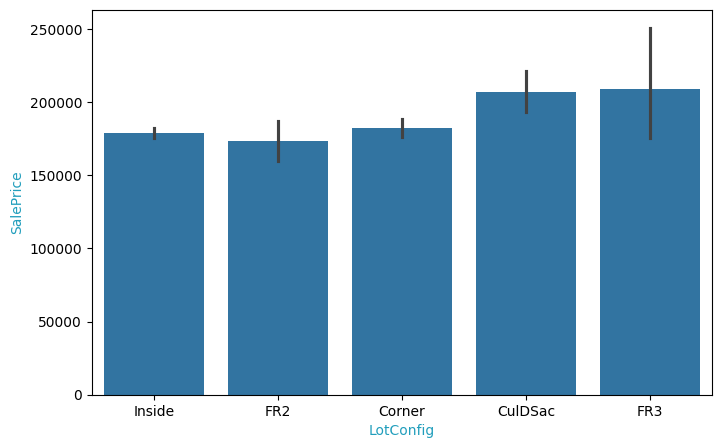

In [826]:
print(all_df['LotConfig'].value_counts())
sns.barplot(data = all_df, x = 'LotConfig', y = 'SalePrice')

If we read description file then can take one decision as Combining FR2 and FR3 as 'Mutiple Frontage'

In [827]:
all_df['LotConfig'] = all_df['LotConfig'].apply(lambda x : 'MultipleFrontage' if x in ('FR2', 'FR3') else x)
print(all_df['LotConfig'].value_counts())
ohe_cols.append('LotConfig')

LotConfig
Inside              2126
Corner               509
CulDSac              176
MultipleFrontage      97
Name: count, dtype: int64


<code>LandSlope</code>

In [828]:
print(all_df['LandSlope'].value_counts())
ohe_cols.append('LandSlope')

LandSlope
Gtl    2768
Mod     124
Sev      16
Name: count, dtype: int64


Nothing need to change

<code>Neighbourhood</code>

In [829]:
print(all_df['Neighborhood'].value_counts())
ohe_cols.append('Neighborhood')

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    166
Gilbert    164
Sawyer     150
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    107
Crawfor    103
IDOTRR      89
NoRidge     71
Timber      71
StoneBr     51
SWISU       48
ClearCr     43
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64


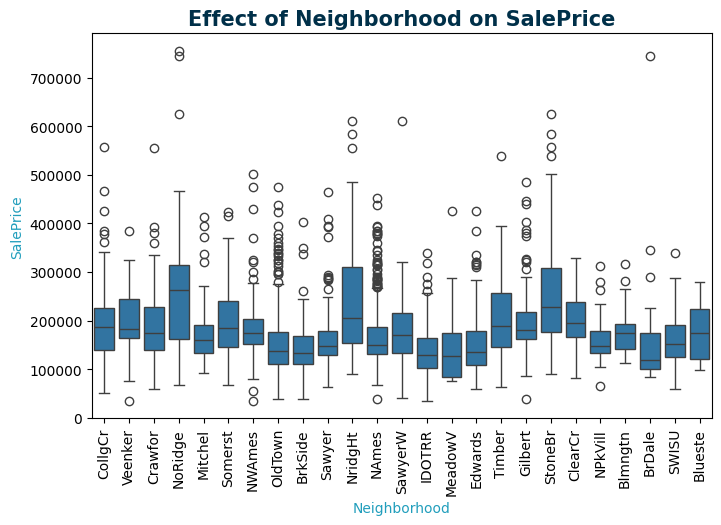

In [830]:
sns.boxplot(data=all_df, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=90)
plt.title('Effect of Neighborhood on SalePrice')
plt.show()

It looks like this feature may contain some effect on sales price. So Leaving this as it is for now

<code>Condition1</code>

Condition1
Norm      2504
Feedr      161
Artery      91
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: count, dtype: int64


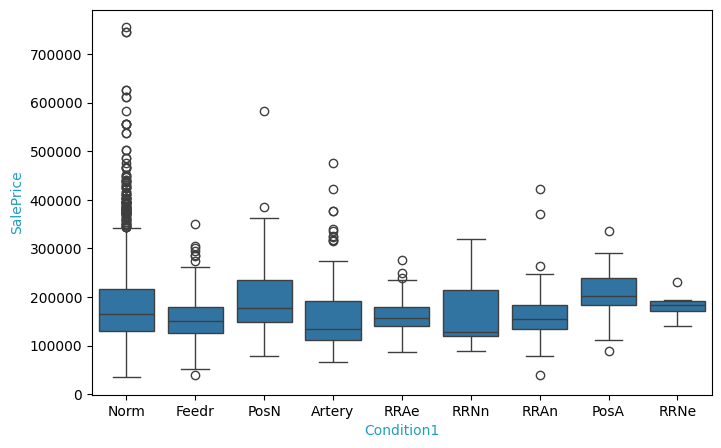

In [831]:
print(all_df['Condition1'].value_counts())
sns.boxplot(data = all_df, x = 'Condition1', y = 'SalePrice')
ohe_cols.append('Condition1')

Since We can clearly see dispersion in Mean price of Categories so it's may an important feature.

<code>Condition2</code>

Condition2
Norm      2878
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: count, dtype: int64


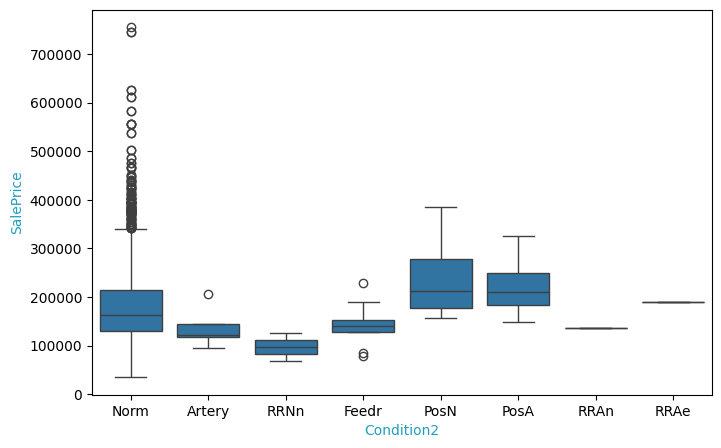

In [832]:
print(df['Condition2'].value_counts())
sns.boxplot(data = all_df, x = "Condition2", y = 'SalePrice')
ohe_cols.append('Condition2')

Looks like this can also be fit feature for predicting the price

<code>BldgType</code>

In [833]:
print(all_df['BldgType'].value_counts())
ohe_cols.append('BldgType')


BldgType
1Fam      2414
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: count, dtype: int64


<code>HouseStyle</code>

HouseStyle
1Story    1464
2Story     871
1.5Fin     312
SLvl       127
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64


Text(0.5, 1.0, 'Effect of HouseStyle on Price')

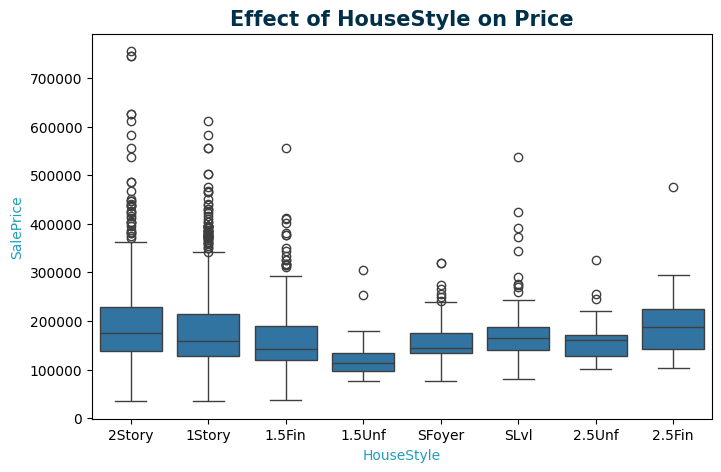

In [834]:
print(all_df['HouseStyle'].value_counts())
ohe_cols.append('HouseStyle')
sns.boxplot(data = all_df, x = 'HouseStyle', y = 'SalePrice')
plt.title('Effect of HouseStyle on Price')

It's an Important feature for analysis

<code>OverallCond</code>

In [835]:
print(df['OverallCond'].value_counts())
df['OverallCond'] = df['OverallCond'].astype('int')

OverallCond
5    1643
6     529
7     387
8     144
4     100
3      49
9      41
2       9
1       6
Name: count, dtype: int64


<code>RoofStyle</code>

RoofStyle
Gable      2301
Hip         550
Gambrel      22
Flat         19
Mansard      11
Shed          5
Name: count, dtype: int64


<Axes: xlabel='RoofStyle', ylabel='SalePrice'>

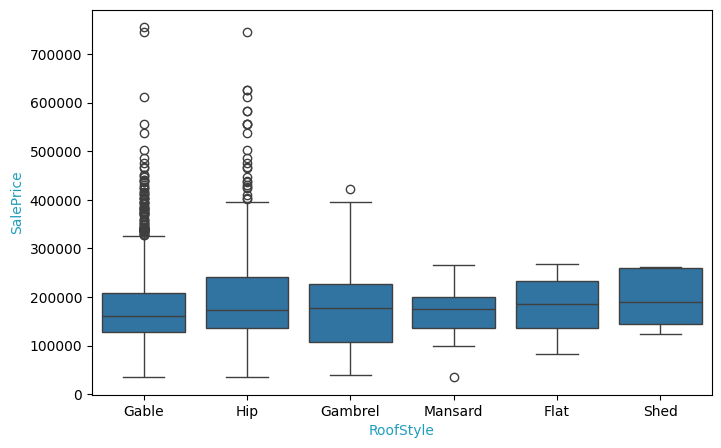

In [836]:
print(df['RoofStyle'].value_counts())
ohe_cols.append('RoofStyle')
sns.boxplot(data = all_df, x = 'RoofStyle', y = 'SalePrice')


In [837]:
from scipy.stats import f_oneway

# Group SalePrice by RoofStyle
groups = [all_df[all_df['RoofStyle'] == category]['SalePrice'] 
          for category in all_df['RoofStyle'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 11.147698032367982, P-value: 1.1659234407321013e-10


This suggests that RoofStyle is likely relevant to predicting SalePrice and should not be discarded based on these results.

<code>RoofMatl</code>

In [838]:
df['RoofMatl'].value_counts()
##Introductin other column
print(introduce_other('RoofMatl', 2))
ohe_cols.append('RoofMatl')

RoofMatl
CompShg    2866
Tar&Grv      22
WdShake       9
WdShngl       7
Other         4
Name: count, dtype: int64


<code>Exterior1st</code>

In [839]:
df['Exterior1st'].value_counts()
## Creating Other data
introduce_other('Exterior1st', 50)
ohe_cols.append('Exterior1st')

['Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

<code>Exterior2nd</code>

In [840]:
print(all_df['Exterior2nd'].value_counts())
introduce_other('Exterior2nd', 50)
ohe_cols.append('Exterior2nd')

Exterior2nd
VinylSd    1012
MetalSd     447
HdBoard     406
Wd Sdng     388
Plywood     267
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        2
Other         1
Name: count, dtype: int64


<code>MasVnrType</code>

In [841]:
print(all_df['MasVnrType'].value_counts())
ohe_cols.append('MasVnrType')

MasVnrType
None       1738
BrkFace     884
Stone       256
BrkCmn       30
Name: count, dtype: int64


<code>ExterQual</code>

In [842]:
print(all_df['ExterQual'].value_counts())
Label_encod = ['ExterQual']

ExterQual
TA    1790
Gd     979
Ex     107
Fa      32
Name: count, dtype: int64


<code>ExterCond</code>

In [843]:
print(all_df['ExterCond'].value_counts())
Label_encod.append('ExterCond')

ExterCond
TA    2530
Gd     299
Fa      65
Ex      12
Po       2
Name: count, dtype: int64


<code>Foundation</code>

In [844]:
print(all_df['Foundation'].value_counts())
ohe_cols.append('Foundation')

Foundation
PConc     1305
CBlock    1231
BrkTil     309
Slab        47
Stone       11
Wood         5
Name: count, dtype: int64


<code>BsmtQual</code>

In [845]:
print(all_df['BsmtQual'].value_counts())
Label_encod.append('BsmtQual')

BsmtQual
TA             1293
Gd             1230
Ex              241
No Basement      74
Fa               70
Name: count, dtype: int64


['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

<code>BsmtCond</code>

In [846]:
print(all_df['BsmtCond'].value_counts())
Label_encod.append('BsmtCond')

BsmtCond
TA             2612
Gd              129
Fa               89
No Basement      74
Po                4
Name: count, dtype: int64


<code>BsmtExposure</code>

In [847]:
print(all_df['BsmtExposure'].value_counts())

BsmtExposure
No             1896
Av              441
Gd              267
Mn              228
No Basement      76
Name: count, dtype: int64


Since i already have seen the description file and i know this type of ratign No, AV, Gd, Mn won't come in any other feature so directly preprocessing this column

In [848]:
all_df['BsmtExposure'] = df['BsmtExposure'].map({'No Basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4 })
print(all_df['BsmtExposure'].value_counts())

BsmtExposure
1    1896
3     441
4     267
2     228
0      76
Name: count, dtype: int64


<code>BsmtFinType1</code>

In [849]:
print(all_df['BsmtFinType1'].value_counts())

BsmtFinType1
Unf            856
GLQ            833
ALQ            436
BLQ            295
Rec            266
LwQ            148
No Basement     74
Name: count, dtype: int64


       GLQ  Good Living Quarters  -> 6
       ALQ	Average Living Quarters -> 5
       BLQ	Below Average Living Quarters	 -> 4
       Rec	Average Rec Room -> 3
       LwQ	Low Quality -> 2
       Unf	Unfinshed -> 1
       NA	No Basement -> 0

In [850]:
## Applying above rating for this column
all_df['BsmtFinType1'] = df['BsmtFinType1'].map({
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'No Basement': 0
})

all_df['BsmtFinType1'].value_counts()

BsmtFinType1
1    856
6    833
5    436
4    295
3    266
2    148
0     74
Name: count, dtype: int64

<code>BsmtFinType2</code>

In [851]:
all_df['BsmtFinType2'].value_counts()

BsmtFinType2
Unf            2500
Rec             107
LwQ              93
No Basement      76
BLQ              66
ALQ              38
GLQ              28
Name: count, dtype: int64

In [852]:
## Applying same encoding for this also
## Applying above rating for this column
all_df['BsmtFinType2'] = all_df['BsmtFinType2'].map({
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'No Basement': 0
})

all_df['BsmtFinType2'].value_counts()

BsmtFinType2
1    2500
3     107
2      93
0      76
4      66
5      38
6      28
Name: count, dtype: int64

<code>Heating</code>

In [853]:
print(all_df['Heating'].value_counts())
ohe_cols.append('Heating')

Heating
GasA     2864
GasW       27
Grav        9
Wall        5
OthW        2
Floor       1
Name: count, dtype: int64


<code>HeatingQC</code>

In [854]:
print(all_df['HeatingQC'].value_counts())
Label_encod.append('HeatingQC')

HeatingQC
Ex    1491
TA     852
Gd     472
Fa      91
Po       2
Name: count, dtype: int64


['CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

<code>CentralAir</code>

In [855]:
print(all_df['CentralAir'].value_counts())

## creating it as a binary column
all_df['CentralAir'] = df['CentralAir'].map({'Y': 1, 'N': 0})
all_df['CentralAir'].value_counts()



CentralAir
Y    2715
N     193
Name: count, dtype: int64


CentralAir
1    2715
0     193
Name: count, dtype: int64

<code>Electrical</code>

Electrical
SBrkr    2665
FuseA     184
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64


<Axes: xlabel='Electrical', ylabel='SalePrice'>

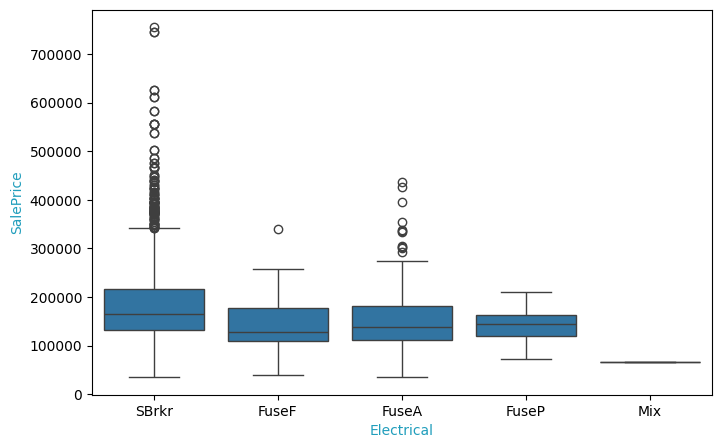

In [856]:
print(all_df['Electrical'].value_counts())
## let's see is it affecting the sale price

sns.boxplot(data = all_df, x = 'Electrical', y = 'SalePrice')

In [857]:
print(df.groupby('Electrical').SalePrice.mean().sort_values(ascending = False))


Electrical
SBrkr    183584.441276
FuseA    153720.048913
FuseF    142902.740000
FuseP    141125.000000
Mix       67000.000000
Name: SalePrice, dtype: float64


By description i can take this decision on this feature

In [858]:
## creating other column for less than 20 data
introduce_other('Electrical', 20)

## Now Ranking them according to mean Price
all_df['Electrical'] = all_df['Electrical'].map(
    {
        'SBrkr': 4,
        'FuseA': 3,
        'FuseF': 2,
        'Other': 1
    }
)

all_df['Electrical'].value_counts()


Electrical
4    2665
3     184
2      50
1       9
Name: count, dtype: int64

<code>KitchenQual</code>

In [859]:
print(df['KitchenQual'].value_counts())
Label_encod.append('KitchenQual')

KitchenQual
TA    1487
Gd    1149
Ex     204
Fa      68
Name: count, dtype: int64


<code>Functional</code>

In [860]:
df['Functional'].value_counts()

Functional
Typ     2711
Min2      69
Min1      64
Mod       34
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

From Description file it's look like Maj1 and Maj2 defining Major Deduction. So Let's first see is statistics on this data allowing us to create new data point As Maj only that basically mean Maj1 or Maj2.

<Axes: xlabel='Functional', ylabel='SalePrice'>

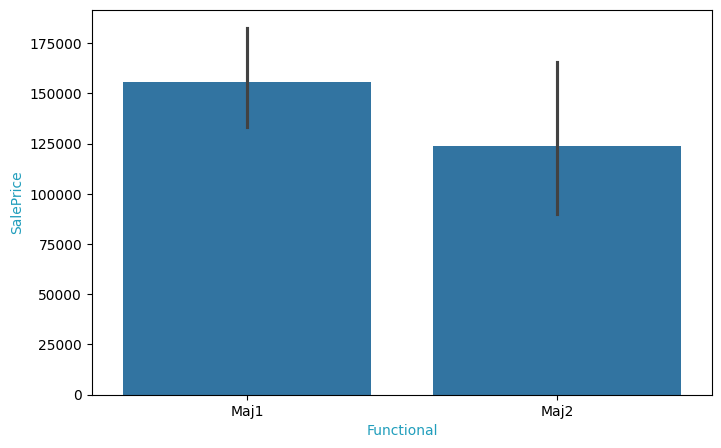

In [861]:
## creating a new dataframe containing Data only where Maj1 or Maj2 Functionality is there
majors = all_df[(all_df['Functional'] == 'Maj1') | (all_df['Functional'] == 'Maj2')][['Functional', 'SalePrice']]

## creating a box plot to see their effect on SalePrice
sns.barplot(data = majors, x = 'Functional', y = 'SalePrice')


By this chart i can say that Maj1 has high sales but it may be just because lower data points for Maj2 so creating one more chart for decision

<Axes: xlabel='Functional', ylabel='SalePrice'>

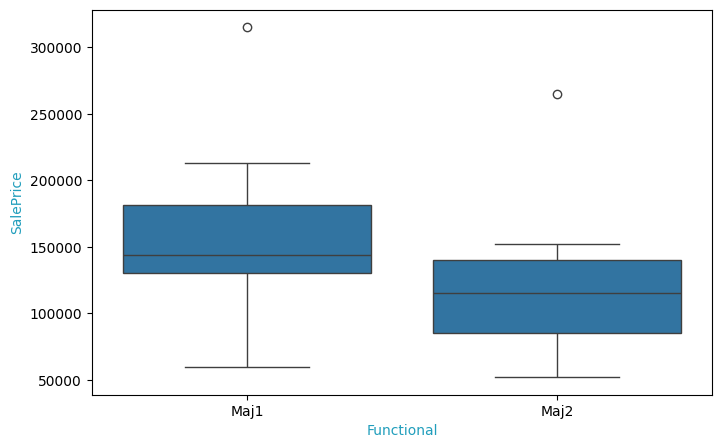

In [862]:
sns.boxplot(data = majors, x = 'Functional', y = 'SalePrice')

Now here clearly i can see that Maj1 has more SalePrice comparision to maj2 and his variance for IQR is also larger than Maj2 <b style = 'color: red'>so we can't create any new data point here</b>

Description File clearly indicates an ordinal relation for Functional so transforming this data

In [863]:
# Define the rankings
all_df['Functional'] = all_df['Functional'].map({
    'Typ': 7,
    'Min1': 6,
    'Min2': 5,
    'Mod': 4,
    'Maj1': 3, 
    'Maj2': 2,
    'Sev': 1,
    'Sal': 0
})

all_df['Functional'].value_counts()


Functional
7    2711
5      69
6      64
4      34
3      19
2       9
1       2
Name: count, dtype: int64

<code>FirePlaceQU</code>

In [864]:
print(df['FireplaceQu'].value_counts())
Label_encod.append('FireplaceQu')

FireplaceQu
No Fireplace    1374
Gd               759
TA               622
Fa                66
Ex                47
Po                40
Name: count, dtype: int64


['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

<code>GarageType</code>

In [865]:
print(df['GarageType'].value_counts())

## introductin other column
introduce_other('GarageType', 30)

ohe_cols.append('GarageType')

GarageType
Attchd       1719
Detchd        774
BuiltIn       185
No Garage     156
Basment        36
2Types         23
CarPort        15
Name: count, dtype: int64


<code>GarageFinish</code>

In [866]:
print(all_df['GarageFinish'].value_counts())

## this feature can be ordinaly rank
all_df['GarageFinish'] = all_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf':1, 'No Garage': 0 })
all_df['GarageFinish'].value_counts()

GarageFinish
Unf          1222
RFn           811
Fin           718
No Garage     157
Name: count, dtype: int64


GarageFinish
1    1222
2     811
3     718
0     157
Name: count, dtype: int64

<code>GarageQual</code>

In [867]:
print(df['GarageQual'].value_counts())
Label_encod.append('GarageQual')

GarageQual
TA           2597
No Garage     157
Fa            122
Gd             24
Po              5
Ex              3
Name: count, dtype: int64


<code>GarageCond</code>

In [868]:
print(df['GarageCond'].value_counts())
Label_encod.append('GarageCond')

GarageCond
TA           2648
No Garage     157
Fa             72
Gd             15
Po             13
Ex              3
Name: count, dtype: int64


<code>PavedDrive</code>

In [869]:
print(all_df['PavedDrive'].value_counts())

## This feature clearly indicates a ordinal relatoin so giving rank to them
all_df['PavedDrive'] = all_df['PavedDrive'].map({'Y': 3, 'P': 2, 'N': 1})  ## read description to know the ranking
all_df.PavedDrive.value_counts()

PavedDrive
Y    2634
N     212
P      62
Name: count, dtype: int64


PavedDrive
3    2634
1     212
2      62
Name: count, dtype: int64

<code>PoolQC</code>

In [870]:
print(all_df.PoolQC.value_counts())

PoolQC
No Pool    2894
Gd            6
Ex            4
Fa            4
Name: count, dtype: int64


Since Data has not that much of variability so making it a binary column <code>'Has Pool' : 1-> yes, 0 -> No Pool</code>

In [871]:
all_df['PoolQC'] = all_df['PoolQC'].apply(lambda x: 0 if x == "No Pool" else 1)
all_df['PoolQC'].value_counts()

PoolQC
0    2894
1      14
Name: count, dtype: int64

<code>Fence</code>

In [872]:
all_df['Fence'].value_counts()

Fence
No Fence    2345
MnPrv        315
GdPrv        118
GdWo         108
MnWw          22
Name: count, dtype: int64

According To description File: 
       <li>GdPrv	Good Privacy</li>
       <li>MnPrv	Minimum Privacy</li>
       <li>GdWo	Good Wood</li>
       <li>MnWw	Minimum Wood/Wire</li>
       <li>NA	No Fence</li>

Clearly They are showing an ordinal ranking

In [873]:
## tranforming Fence column
all_df['Fence'] = all_df['Fence'].map({
    'GdPrv': 4,
    'MnPrv': 3,
    'GdWo': 2,
    'MnWw': 1,
    'No Fence': 0
})

all_df.Fence.value_counts()

Fence
0    2345
3     315
4     118
2     108
1      22
Name: count, dtype: int64

<code>MiscFeature</code>

In [874]:
print(all_df.MiscFeature.value_counts())

## introducing other column
introduce_other('MiscFeature', 10)
all_df.MiscFeature.value_counts()

## will consider it for OHE column
ohe_cols.append('MiscFeature')

MiscFeature
None    2801
Shed      97
Gar2       4
Othr       4
TenC       2
Name: count, dtype: int64


<code>SaleType</code>

In [875]:
df.SaleType.value_counts()

SaleType
WD       2519
New       239
COD        85
ConLD      24
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

Let's see how sale type is effecting sales

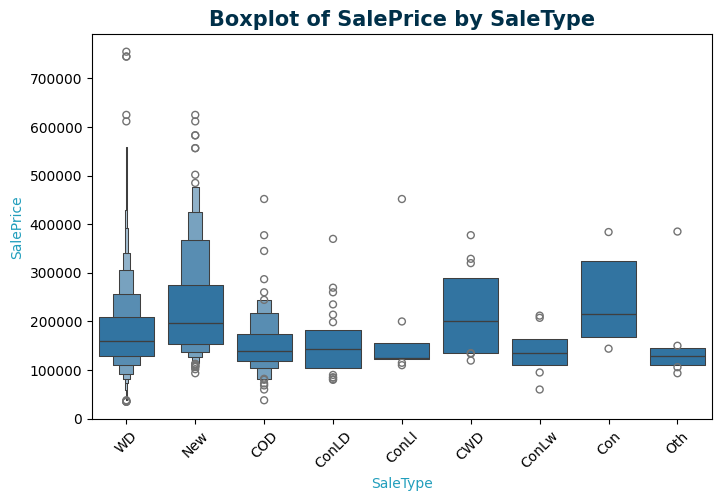

In [876]:
sns.boxenplot(data = all_df, x = 'SaleType', y = 'SalePrice')
plt.xticks(rotation=45)
plt.title("Boxplot of SalePrice by SaleType")
plt.show()

In [877]:
## Let's see the effect on mean price also
mean_SaleType = all_df.groupby('SaleType')['SalePrice'].mean().sort_values(ascending = False)
mean_SaleType

SaleType
Con      247014.000000
New      231041.928870
CWD      217450.000000
WD       177117.354903
ConLI    171938.888889
Oth      159635.714286
ConLD    158903.250000
COD      153742.070588
ConLw    138675.000000
Name: SalePrice, dtype: float64

For this column am not able to take decision wheter to create an OHE for this or they should label encode. But for me as of now can't see any ordinal strong relation b/w this. I don't like to create OHE for this column since has a 9 unique values my features in column will be to high. So at this case i will replace all the values by their mean price it will make sense for the model that who is more important.

In [878]:
mean_SaleType.to_dict()
all_df['SaleType'] = all_df.SaleType.map(np.round(mean_SaleType))
print(all_df.SaleType.value_counts())


SaleType
177117.0    2519
231042.0     239
153742.0      85
158903.0      24
217450.0      12
171939.0       9
138675.0       8
159636.0       7
247014.0       5
Name: count, dtype: int64


<code>SaleCond</code>

In [879]:
all_df['SaleCondition'].value_counts()

SaleCondition
Normal     2395
Partial     245
Abnorml     187
Family       46
Alloca       23
AdjLand      12
Name: count, dtype: int64

<Axes: xlabel='SaleCondition', ylabel='SaleType'>

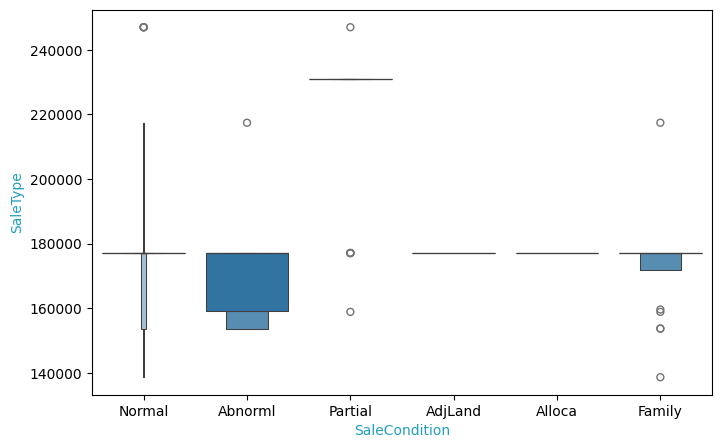

In [880]:
sns.boxenplot(data = all_df, x = 'SaleCondition', y = 'SaleType')

In [881]:
from scipy.stats import f_oneway
import pandas as pd

# Perform ANOVA
groups = [all_df[all_df['SaleCondition'] == cat]['SalePrice'] for cat in all_df['SaleCondition'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, p-value: {p_value}")



F-statistic: 26.06207258515191, p-value: 7.935223109374715e-26


In [882]:
all_df['SaleCondition'] = all_df.SaleCondition.map(np.round(all_df.groupby('SaleCondition')['SaleType'].mean()).to_dict())
all_df.SaleCondition.value_counts()

SaleCondition
176749.0    2395
229932.0     245
170990.0     187
175141.0      46
177117.0      35
Name: count, dtype: int64

In [883]:
ohe_cols = list(ohe_cols) ## again converting back to list

Since All the cat cols have over now applying the transformation on these columns

In [884]:
all_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,RemodelAge,dateSold
0,60,RL,4.189655,9.042040,0,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,None,0.000000,177117.0,176749.0,208500.0,21,21,2008-02-01
1,20,RL,4.394449,9.169623,0,Reg,Lvl,MultipleFrontage,Gtl,Veenker,...,0,0,None,0.000000,177117.0,176749.0,181500.0,48,48,2007-05-01
2,60,RL,4.234107,9.328212,0,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,None,0.000000,177117.0,176749.0,223500.0,23,22,2008-09-01
3,Other,RL,4.110874,9.164401,0,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,None,0.000000,177117.0,170990.0,140000.0,109,54,2006-02-01
4,60,RL,4.442651,9.565284,0,IR1,Lvl,MultipleFrontage,Gtl,NoRidge,...,0,0,None,0.000000,177117.0,176749.0,250000.0,24,24,2008-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Other,RM,4.454347,8.976894,0,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,None,0.000000,177117.0,176749.0,175000.0,54,54,2006-06-01
1455,Other,RM,4.204693,9.486152,0,Reg,Lvl,Inside,Gtl,MeadowV,...,0,3,None,0.000000,177117.0,170990.0,210000.0,54,54,2006-04-01
1456,20,RL,4.234107,9.109746,0,Reg,Lvl,Inside,Gtl,Mitchel,...,0,4,Shed,7.824446,177117.0,170990.0,266500.0,64,28,2006-09-01
1457,Other,RL,4.330733,9.181735,0,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,None,0.000000,177117.0,176749.0,142125.0,32,32,2006-07-01


In [885]:
## Importing trasnformer for applying trasnformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
trf = ColumnTransformer([
    ('',OneHotEncoder(sparse_output = False), ohe_cols),
])

In [886]:
trf.fit(all_df)
ohe_trf = trf.transform(all_df)
## creating new dataframe with all the features
ohe_df = pd.DataFrame(ohe_trf, columns =  trf.get_feature_names_out())
ohe_df

,__MSSubClass_120,__MSSubClass_20,__MSSubClass_50,__MSSubClass_60,__MSSubClass_Other,__MSZoning_FV,__MSZoning_Other,__MSZoning_RL,__MSZoning_RM,__LotShape_IR1,...,__Heating_Wall,__GarageType_Attchd,__GarageType_Basment,__GarageType_BuiltIn,__GarageType_Detchd,__GarageType_No Garage,__GarageType_Other,__MiscFeature_None,__MiscFeature_Other,__MiscFeature_Shed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2904,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2905,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2906,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [887]:
## dropping original ohe cols from the data
all_df.drop(ohe_cols, axis = 1, inplace = True)

## resetting the index to avoid any error
all_df.reset_index(drop=True, inplace=True)
ohe_df.reset_index(drop=True, inplace=True)

## merging both df
all_df = pd.concat([all_df, ohe_df], axis=1)

In [888]:
all_df

,LotFrontage,LotArea,Alley,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,__Heating_Wall,__GarageType_Attchd,__GarageType_Basment,__GarageType_BuiltIn,__GarageType_Detchd,__GarageType_No Garage,__GarageType_Other,__MiscFeature_None,__MiscFeature_Other,__MiscFeature_Shed
0,4.189655,9.042040,0,7,5,5.283204,Gd,TA,Gd,TA,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.394449,9.169623,0,6,8,0.000000,TA,TA,Gd,TA,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.234107,9.328212,0,7,5,5.093750,Gd,TA,Gd,TA,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.110874,9.164401,0,7,5,0.000000,TA,TA,TA,Gd,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4.442651,9.565284,0,8,5,5.860786,Gd,TA,Gd,TA,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,4.454347,8.976894,0,4,7,4.787492,TA,TA,Gd,TA,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2904,4.204693,9.486152,0,4,5,0.000000,TA,TA,Gd,TA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2905,4.234107,9.109746,0,5,7,0.000000,TA,TA,TA,Gd,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2906,4.330733,9.181735,0,5,5,0.000000,TA,TA,TA,TA,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Let's transform Label_encoded columns

In [889]:
from sklearn.preprocessing import FunctionTransformer
def custom_label_encoder(column):
    mapping = {
        "Ex": 5,
        "Gd": 4,
        "TA": 3,
        "Fa": 2,
        "Po": 1,
        "No Basement": 0,
        "No Fireplace": 0,
        "No Garage": 0
    }
    # Apply the mapping to each column
    return all_df[column].map(mapping)

## applying the function for all the columns
for col in Label_encod:
    all_df[col] = custom_label_encoder(col)
all_df[Label_encod]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,4,3,4,3,5,4,0,3,3
1,3,3,4,3,5,3,3,3,3
2,4,3,4,3,5,4,3,3,3
3,3,3,3,4,4,4,4,3,3
4,4,3,4,3,5,4,3,3,3
...,...,...,...,...,...,...,...,...,...
2903,3,3,4,3,4,3,3,0,0
2904,3,3,4,3,3,3,3,3,3
2905,3,3,3,4,5,3,4,3,3
2906,3,3,3,3,3,3,0,0,0


So At this time we have successfully deal with Cat Cols now let's see about num cols

<b style = 'color: yellow; text-align: right'>Num Cols</b>

In [890]:
## getting all the cols except we preprocessed
columns = all_df.select_dtypes(exclude = 'object').columns.to_list()
num_col = [col for col in columns if col not in cat_cols]
print(num_col)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'HouseAge', 'RemodelAge', 'dateSold', '__MSSubClass_120', '__MSSubClass_20', '__MSSubClass_50', '__MSSubClass_60', '__MSSubClass_Other', '__MSZoning_FV', '__MSZoning_Other', '__MSZoning_RL', '__MSZoning_RM', '__LotShape_IR1', '__LotShape_Other', '__LotShape_Reg', '__LandContour_Bnk', '__LandContour_HLS', '__LandContour_Low', '__LandContour_Lvl', '__LotConfig_Corner', '__LotConfig_CulDSac', '__LotConfig_Inside', '__LotConfig_MultipleFrontage', '__LandSlope_Gtl', '__LandSlope_Mod', '__LandSlope_Sev', '__Neighborhood_Blmngtn', '__Neighborhood_Blueste', '__Neighborhood_BrDale'

Only different column is dateSold that should not be numeric

In [891]:
## checking dateSold column
all_df['dateSold']

0      2008-02-01
1      2007-05-01
2      2008-09-01
3      2006-02-01
4      2008-12-01
          ...    
2903   2006-06-01
2904   2006-04-01
2905   2006-09-01
2906   2006-07-01
2907   2006-11-01
Name: dateSold, Length: 2908, dtype: datetime64[ns]

Is Date sold making any significant effect on SalePrice?? Let's first try to answer it

In [892]:
## Getting only Year of Sold
all_df['dateSold'] = pd.to_datetime(all_df['dateSold'])

Text(0.5, 1.0, 'Effect of YearSold on SalePrice')

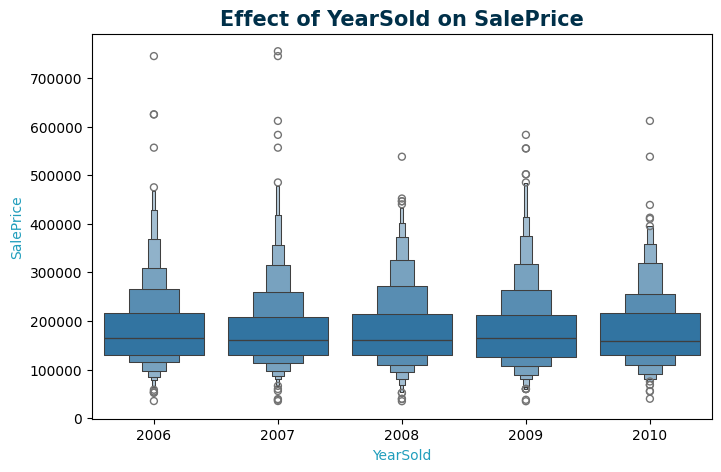

In [893]:
all_df['YearSold'] = all_df['dateSold'].dt.year
sns.boxenplot(data = all_df, x = 'YearSold', y = 'SalePrice')
plt.title('Effect of YearSold on SalePrice')

From graph it's looks very clear that YearSold does'nt effect on SalePrice that much but still let's check their mean price also

In [894]:
all_df.groupby(['YearSold'])['SalePrice'].mean().sort_values(ascending = False)

YearSold
2006    182485.714055
2008    180958.504870
2009    180645.054180
2007    180155.625544
2010    179364.304734
Name: SalePrice, dtype: float64

From above both result it's very obvious that SalePrice is not affected by YearSold. So deleting this column  and check if month are efffecting price or not

Text(0.5, 1.0, 'Effect of monthsold on SalePrice')

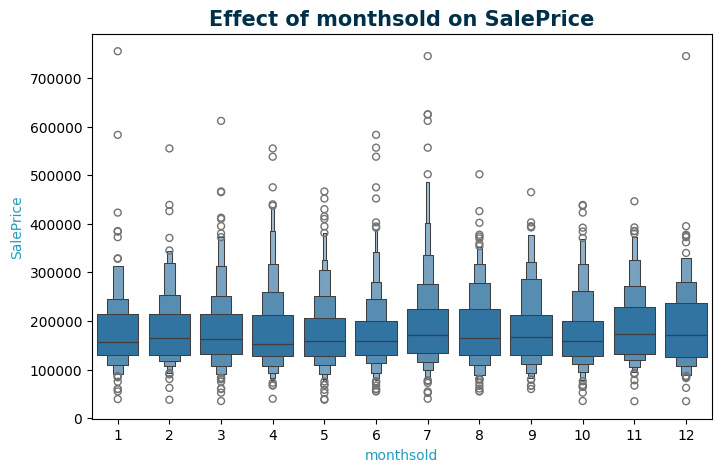

In [895]:
all_df.drop('YearSold', axis = 1, inplace = True)

## creatign month column for analysis
all_df['monthsold'] = all_df['dateSold'].dt.month

## creqting boxplot to analyse
sns.boxenplot(data = all_df, x = 'monthsold', y = 'SalePrice')
plt.title('Effect of monthsold on SalePrice')

Effect if almost neglible if ignore outliers (or may be real data)

In [896]:
all_df.groupby('monthsold').SalePrice.mean().sort_values()

monthsold
5     174225.859694
6     174867.566600
10    176562.366279
4     177813.197842
1     178991.483333
3     179383.256522
8     182665.283262
2     182670.166667
9     184629.630573
11    187922.957746
12    190415.384615
7     190869.058427
Name: SalePrice, dtype: float64

Seeing the above mean price result it's very obvious that months are not effecting the price. Now one last thing let's see if seasons if effecting the salePrice

In [897]:
all_df['Season'] = all_df['monthsold'].apply(
    lambda x: "Winter" if x in (11, 12, 1, 2) else
              "Summer" if x in (3, 4, 5, 6) else
              "Raining" if x in (7, 8) else
              "Spring"
)

all_df.Season.value_counts()


Season
Summer     1403
Raining     678
Winter      498
Spring      329
Name: count, dtype: int64

Let's see if Season is affecting the price if not then this column does'nt contribute any meaning for our analysis

<Axes: xlabel='Season', ylabel='SalePrice'>

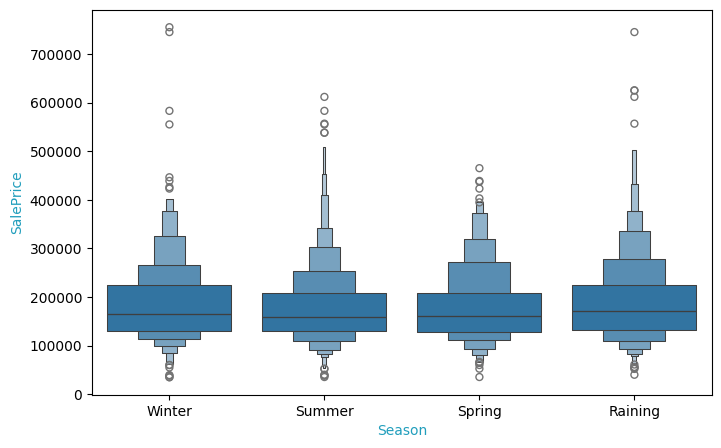

In [898]:
sns.boxenplot(data = all_df, x = 'Season', y = 'SalePrice')

It' seems that Seasons also does'nt effect the price or effecting negligible. So better to remove this feature here itself.

In [899]:
all_df.drop(['dateSold', 'monthsold', 'Season'], axis = 1, inplace = True)
all_df.shape

(2908, 187)

Now we are left we 183 features

Now Let's Split data into training and test test for further scaling and prediction process

In [900]:
## splitting dataset
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(all_df.drop('SalePrice', axis = 1), all_df.SalePrice, test_size = 0.2, random_state = 42 )
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}')
print(f'Y_test: {Y_test.shape}')

X_train: (2326, 186)
X_test: (582, 186)
Y_train: (2326,)
Y_test: (582,)


In [901]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform test data (using the same scaler)
X_test_scaled = scaler.transform(X_test)

In [902]:
## Now adding them to dataframe
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [903]:
X_test.isnull().sum()[X_test.isnull().sum() > 0]

Series([], dtype: int64)

Now Let's predict the output

In [904]:
## Importing Models to check for accuracy
# Import popular regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


# Create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}
X , Y = all_df.drop('SalePrice', axis = 1), all_df.SalePrice
# Evaluation metrics for regression
from sklearn.metrics import root_mean_squared_error as rmse, r2_score
from sklearn.model_selection import cross_val_score

# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        ## doing cross validation
        cv_score = np.mean(cross_val_score(model, X , Y, cv = 5))
        
        # Calculate metrics
        rmse_train = rmse(y_train, y_pred_train)
        rmse_test = rmse(y_test, y_pred_test)
        R2_train = r2_score(y_train, y_pred_train)
        R2_test = r2_score(y_test, y_pred_test)
        
        results[name] = {
            'rmse_train': rmse_train,
            'rmse_test': rmse_test,
            'R2_train' : R2_train,
            'R2_test': R2_test,
            'cross_val_score': cv_score
        }
    
    return pd.DataFrame(results).T

# Evaluate all models
results = evaluate_models(models, X_train, X_test, Y_train, Y_test)
results


,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,37149.589575,39603.855788,0.781097,0.730285,0.711494
Decision Tree,0.000000,27522.001684,1.000000,0.869746,0.937428
Random Forest,8375.016972,22958.637455,0.988875,0.909359,0.938162
Gradient Boosting,19422.416584,25210.443917,0.940166,0.890707,0.906217
SVR,81472.698184,77936.356243,-0.052853,-0.044506,-0.053547


From above result it clearly look like <code>Random Forest, Decision Tree</code> and <code>Gradient Boosting</code> are the top models to predict the SalePrice but before making any decision first observe that Decision Tree model's accuracy on training data is 1 and on test it's 0.87 that indicates the model may overfitting so i won't consider Decision tree model here i will go with Random Forest and Gradient Boosting even though they are also a little bit overfitting the data

<h1 style = 'color: orange'>Conclusion</h1>
The conclusion is that already we are getting pretty good accuracy for our data but can we more imporvise the accuracy? Can we increaes our accuracy upto 95 or close? For That i will work on a new File where i'll try to do feature extraction or reduction.

In [905]:
## saving the file for further process
all_df.to_pickle('model_with_all_features.pkl')